In [3]:
import torch

数据列名（包含的训练指标）：
['cell_sets_per_sec', 'epoch', 'flops_per_batch', 'mfu (%)', 'step', 'train_loss', 'val_loss']


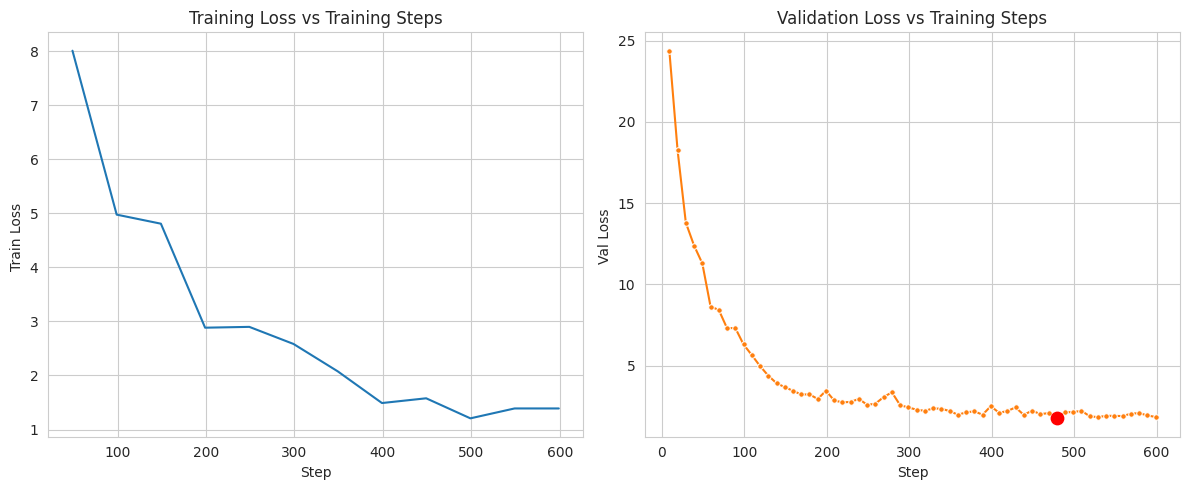

KeyError: ['batches_per_second']

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

metrics = pd.read_csv("/home/lurui/state/tx_train_experiment/cellline_11.1.2/version_0/metrics.csv")

print("="*50)
print("数据列名（包含的训练指标）：")
print(metrics.columns.tolist())  # 输出所有列名，确认是否有 train_loss、val_loss 等

df = metrics.sort_values("step").reset_index(drop=True)
train_df = df.dropna(subset=["train_loss"])[["step", "train_loss"]]
val_df = df.dropna(subset=["val_loss"])[["step", "val_loss"]]

# 绘图
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")

# 子图1：训练损失曲线
plt.subplot(1, 2, 1)
sns.lineplot(x="step", y="train_loss", data=train_df, color="#1f77b4", linewidth=1.5)
plt.title("Training Loss vs Training Steps", fontsize=12)
plt.xlabel("Step", fontsize=10)
plt.ylabel("Train Loss ", fontsize=10)
plt.xticks(rotation=0)

# 子图2：验证损失曲线（标注最优值）
plt.subplot(1, 2, 2)
sns.lineplot(x="step", y="val_loss", data=val_df, color="#ff7f0e", linewidth=1.5, marker="o", markersize=4)
# 标注最优验证损失
best_val = val_df["val_loss"].min()
best_step = val_df[val_df["val_loss"] == best_val]["step"].iloc[0]
plt.scatter(best_step, best_val, color="red", s=80, zorder=5)
# plt.annotate(f"Best: {best_val:.4f}\nStep: {best_step}", 
#              xy=(best_step, best_val), 
#              xytext=(best_step+5000, best_val+0.2),
#              arrowprops=dict(arrowstyle="->", color="red", lw=1.5),
#              fontsize=9)
plt.title("Validation Loss vs Training Steps", fontsize=12)
plt.xlabel("Step", fontsize=10)
plt.ylabel("Val Loss ", fontsize=10)
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig("train_val_loss.png", dpi=300, bbox_inches="tight")
plt.show()

# 提取硬件相关指标（去除空值）
hardware_df = df.dropna(subset=["mfu (%)", "batches_per_second"])[["step", "mfu (%)", "batches_per_second"]]

plt.figure(figsize=(12, 5))

# 子图1：GPU 模型计算利用率（mfu）
plt.subplot(1, 2, 1)
sns.lineplot(x="step", y="mfu (%)", data=hardware_df, color="#2ca02c", linewidth=1.5)
plt.axhline(y=50, color="red", linestyle="--", alpha=0.7, label="50% ")  # 最低合理利用率
plt.title("GPU Model Flops Utilization (MFU) vs Steps", fontsize=12)
plt.xlabel("Step", fontsize=10)
plt.ylabel("MFU (%)", fontsize=10)
plt.legend()

# 子图2：每秒批次数（训练速度）
plt.subplot(1, 2, 2)
sns.lineplot(x="step", y="batches_per_second", data=hardware_df, color="#d62728", linewidth=1.5)
plt.title("Batches Per Second (Training Speed) vs Steps", fontsize=12)
plt.xlabel("Step", fontsize=10)
plt.ylabel("Batches Per Second", fontsize=10)

plt.tight_layout()
# plt.savefig("hardware_utilization.png", dpi=300, bbox_inches="tight")
plt.show()

# 提取批次时间相关指标
batch_time_df = df[["step", "batch_time_avg", "batch_time_max", "batch_time_min"]].dropna()

plt.figure(figsize=(10, 6))
sns.lineplot(x="step", y="batch_time_avg", data=batch_time_df, label="Average Batch Time", color="blue", linewidth=1.5)
sns.lineplot(x="step", y="batch_time_max", data=batch_time_df, label="Max Batch Time", color="red", linestyle="--", alpha=0.8)
sns.lineplot(x="step", y="batch_time_min", data=batch_time_df, label="Min Batch Time", color="green", linestyle="--", alpha=0.8)
plt.title("Batch Time Distribution vs Training Steps", fontsize=12)
plt.xlabel("Step", fontsize=10)
plt.ylabel("Batch Time (Seconds)", fontsize=10)
plt.legend()
plt.grid(alpha=0.3)
# plt.savefig("batch_time_analysis.png", dpi=300, bbox_inches="tight")
plt.show()